In [ ]:
%matplotlib inline


PyTorch: Tensors and autograd
-------------------------------

完全连接的ReLU网络，具有一个隐藏层且没有偏差，经过训练可以通过最小化平方的欧几里得距离来从x预测y。

此实现使用PyTorch张量来计算前向通过，并使用PyTorch autograd来计算梯度。

PyTorch张量表示计算图中的一个节点。 如果``x``是具有``x.requires_grad=True``的张量，则``x.grad`` 是另一个张量，它持有``x``相对于某个标量值的梯度。




In [1]:
import torch
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # 如果在GPU，使用此行

# N是批量大小，D_in是输入维度;
# H是隐藏层维度，D_out是输出维度。
N, D_in, H, D_out = 64, 1000, 100, 10

#创建随机张量来保存输入和输出。
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

#为权重创建随机张量
#设置require_grad = False表示在反向传递期间我们不需要针对这些张量计算梯度。
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
plt.figure('Loss')


iter_plot = []
loss_plot = []
for t in range(500):
    # ＃正向传递：使用张量上的运算来计算预测的y； 这些操作与我们使用张量计算正向传递的操作完全相同，
    #但是由于我们不需要手动实现反向传递，因此我们不需要保留对中间值的引用。
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # 使用张量来计算和打印损失。
    # 现在损失是形状为1的张量，loss.item（）获得损失中持有的标量值。
    loss = (y_pred - y).pow(2).sum()
    iter_plot.append(t)
    loss_plot.append(loss.item())
    print(t, loss.item())

    # 使用autograd计算反向传递。 此调用将计算属性require_grad = True所有张量的梯度。
    # 此调用之后，w1.grad和w2.grad将是分别持有损失相对于w1和w2的梯度张量。
    loss.backward()

    # 使用梯度下降手动更新权重。 包装在torch.no_grad（）中，但由于权重具有require_grad = True，
    # autograd会进行跟踪，但是我们不需要在autograd中进行跟踪，所以用torch.no_grad（），
    # 这样使下面的计算图不占用内存
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # 更新权重后手动将梯度归零，不清零的话，再次循环式时会加上现在的值，导致梯度越来越大
        w1.grad.zero_()
        w2.grad.zero_()

0 30817092.0
1 29720450.0
2 36088956.0
3 43249008.0
4 42977184.0
5 30795448.0
6 15732224.0
7 6360563.5
8 2675462.0
9 1413123.0
10 949183.9375
11 732672.6875
12 601845.6875
13 507678.5625
14 434009.21875
15 374153.5
16 324510.5
17 282901.125
18 247855.90625
19 218101.09375
20 192672.46875
21 170809.015625
22 151924.484375
23 135544.328125
24 121293.875
25 108858.7578125
26 97944.1171875
27 88320.328125
28 79811.6484375
29 72267.71875
30 65542.5078125
31 59545.921875
32 54186.375
33 49391.125
34 45083.6875
35 41206.6015625
36 37720.12890625
37 34574.41796875
38 31733.51953125
39 29161.0
40 26827.677734375
41 24707.462890625
42 22780.775390625
43 21027.38671875
44 19425.79296875
45 17961.91796875
46 16622.966796875
47 15396.021484375
48 14271.1943359375
49 13238.453125
50 12289.734375
51 11415.7802734375
52 10611.4033203125
53 9870.12109375
54 9186.4638671875
55 8555.4765625
56 7972.5947265625
57 7433.8779296875
58 6935.29833984375
59 6474.328125
60 6047.4462890625
61 5652.361328125
62 52

399 0.0005838130600750446
400 0.0005672347615472972
401 0.0005493764765560627
402 0.0005343996454030275
403 0.000518481305334717
404 0.0005029614549130201
405 0.0004872818535659462
406 0.00047364234342239797
407 0.00046054035192355514
408 0.0004471869324333966
409 0.00043500197352841496
410 0.00042324658716097474
411 0.00041107722790911794
412 0.0004002487985417247
413 0.00038990151369944215
414 0.0003783587890211493
415 0.00036840958637185395
416 0.00035785831278190017
417 0.0003491304232738912
418 0.00034022494219243526
419 0.00033126529888249934
420 0.0003217689518351108
421 0.000313152268063277
422 0.00030561257153749466
423 0.0002984889142680913
424 0.0002901001425925642
425 0.0002832294558174908
426 0.00027559162117540836
427 0.0002691180561669171
428 0.00026234533288516104
429 0.00025611300952732563
430 0.00025030242977663875
431 0.00024356739595532417
432 0.00023812797735445201
433 0.00023212036467157304
434 0.00022752357472199947
435 0.00022204098058864474
436 0.00021629490947

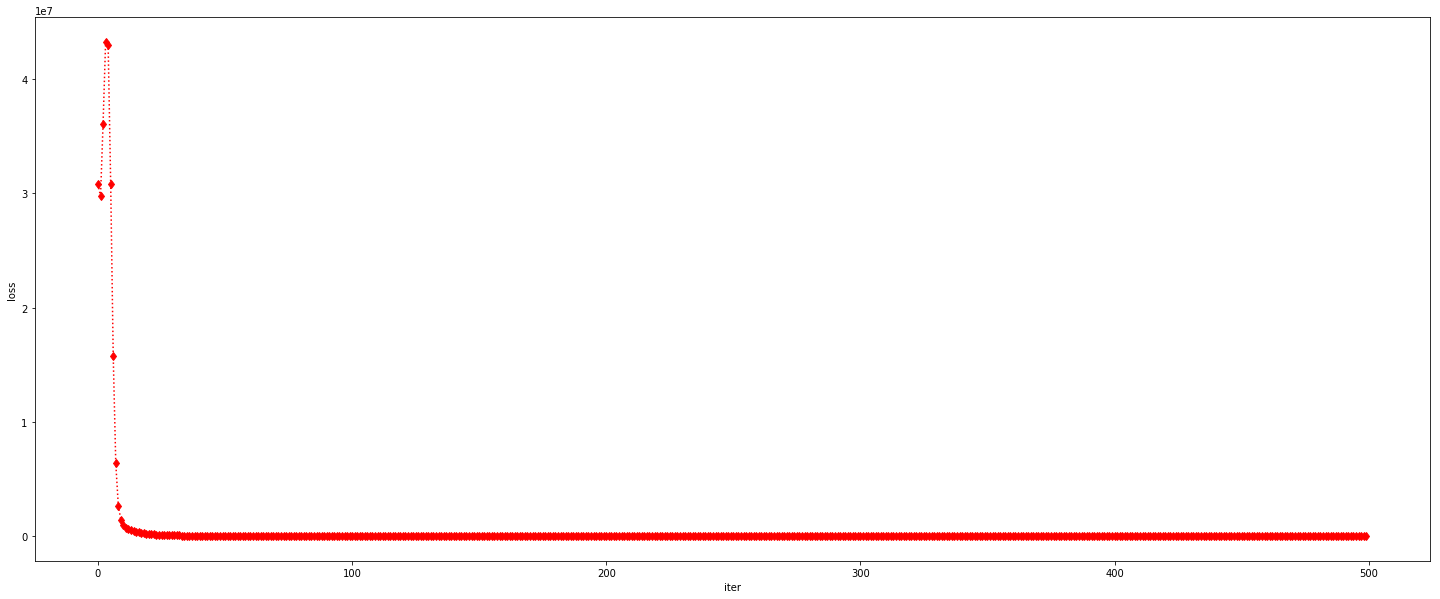

In [2]:
plt.figure(figsize=(25,10))
ax = plt.subplot()
#设置x轴、y轴名称
ax.set_xlabel('iter')
ax.set_ylabel('loss')
plt.plot(iter_plot,loss_plot,marker='d',linestyle=':',color='r')
plt.show()